## Notebook demonstrating how to access QF-Idealized-Grass-Plots data

This notebook demonstrates how to access the QF-Idealized-Grass-Plots data.

<h3>Notebook Overview:</h3>
<ol><a href='#introduction'><li>Introduction </li></a>
    <a href='#s3'><li>Examine data in s3 bucket </li></a>
    <a href='#zarr'><li>Open sample zarr file (ex. LongLineIgnition_WS1 experiment)</li></a>
    <a href='#png'><li>Visualize png file</li></a>
    <a href='#2d'><li>Visualize time series in 2d</li></a>
    <a href='#3d'><li>Visualize time series in 3d</li></a>
    
    

<a id='introduction'><h3>Introduction </h3></a>

**Idealized Short/Long Fire Ignition on a Homogeneous Grassland Simulation**

Please contact Daniel Rosales (dgiron@talltimbers.org) for any questions,
comments or concerns about the simulations.

QUIC-Fire -  Version: Jan2022

Working alongside Los Alamos National Lab (LANL), Tall Timbers Research Station (TTRS)
produced a parameter sweep to compare QUIC-Fire to FIRETEC. The canonical example of
an idealized rectangular ignition over a homoegeneous grassland was used and developed.
The QUIC-Fire simulations were made to match the FIRETEC simulations as closely as
possible, with a notable exception made for the vertical grid resolution.  

Provided in this folder are Zarr arrays containing the bulk density over time 
for 10 different runs: 5 wind speeds for a short and a long fire ignitions. The
first time step then is the initial condition of the fuel. The arrays are 
structured as [ntimes,ny,nx,nz]. The 'ntimes' is not the total simulation time
but the amount of time-steps that were outputted. For these simulations, 
that would be every 10 seconds. Provided is a txt file containing the
number of timesteps for each simulation (Table 2). Ny and Nx will be set for 200, 200
for all these runs, and Nz is set to 5 (vertical cells in the fuel grid).

Provided is also the generating text files for the run.

**Table 1. Simulation parameter values**

| Parameter | Value |
| --- | --- |
| Domain Size: | 400 x 400 m  [200 x 200 cells] |
| Simulation Time: | Variable  |
| Time step: | 1 s |
| Vertical Resolution (Fuel Grid):|   5 cells high, 1m uniform [This is the grid that is exported.]  |
| Vertical Resolution (Wind Grid): | 41 cells high, fuel cell heights contained in Vertical_Cell_Heights.txt |
| Bulk Density: | 1.0 kg/m^3 |
| Fuel Moisture: | 0.05 |
| Fuel Height: | 0.7 m |
| Wind Speeds: | 1,2,3,6,12 m/s |
| Wind Direction: | 270 deg. relative to true North (i.e. 270 deg. is a western wind) |
| Topography: | Flat|

**Table 2. Number of Output Timesteps per Simulation [ntimes]**

| Experiment | Number of Output Timesteps per Simulation [ntimes] |
| --- | --- |
| ShortLine_WS1: | 301 |
| ShortLine_WS2: | 182 |
| ShortLine_WS3: | 121 |
| ShortLine_WS6: | 46 |
| ShortLine_WS12: | 17 |
| --- | --- |
| LongLine_WS1: | 301 |
| LongLine_WS2: | 121 |
| LongLine_WS3: | 71 |
| LongLine_WS6: | 31 |
| LongLine_WS12: | 14 |

The data are in <a href = "https://zarr.readthedocs.io/">Zarr </a> format, ideal for cloud-optimized storage of chunked, compressed, N-dimensional arrays

In [ ]:
# !pip install zarr

In [1]:
import zarr
import s3fs
import matplotlib.image as img
import matplotlib.pyplot as plt
import pyvista as pv
import numpy as np

In [2]:
s3 = s3fs.S3FileSystem(client_kwargs={
                    "endpoint_url": 'https://wifire-data.sdsc.edu:9000',
                    "verify": False,
                },
                    anon=True
                )

<a id='s3'><h3>Examine data in s3 bucket </h3></a>

In [3]:
# Let's examine the file structure of the s3 bucket holding the data. 
# There are folders containing LongLineIgnition and ShortLinIgnition data as well as Visualizations

s3.ls('public/QF-Idealized-Grass-Plots/')

['public/QF-Idealized-Grass-Plots/LongLineIgnition_WS1',
 'public/QF-Idealized-Grass-Plots/LongLineIgnition_WS12',
 'public/QF-Idealized-Grass-Plots/LongLineIgnition_WS2',
 'public/QF-Idealized-Grass-Plots/LongLineIgnition_WS3',
 'public/QF-Idealized-Grass-Plots/LongLineIgnition_WS6',
 'public/QF-Idealized-Grass-Plots/Ntimes_per_Run.txt.txt',
 'public/QF-Idealized-Grass-Plots/ReadMe.txt',
 'public/QF-Idealized-Grass-Plots/RunFiles',
 'public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS1',
 'public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS12',
 'public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS2',
 'public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS3',
 'public/QF-Idealized-Grass-Plots/ShortLineIgnition_WS6',
 'public/QF-Idealized-Grass-Plots/Visualizations']

In [4]:
# We can see the Outputs.zarr array for the particular LongLineIgnition_WS1 experiment
s3.ls('public/QF-Idealized-Grass-Plots/LongLineIgnition_WS1/')

['public/QF-Idealized-Grass-Plots/LongLineIgnition_WS1/Outputs.zarr']

<a id='zarr'><h3>Let's open the data for LongLineIgnition_WS1 experiment and explore further </h3></a>

In [5]:
# set root for appropriate data path (in this case, let's look at '/public/QF-Idealized-Grass-Plots/LongLineIgnition_WS1/Outputs.zarr' data)

store = s3fs.S3Map(root='/public/QF-Idealized-Grass-Plots/LongLineIgnition_WS1/Outputs.zarr', s3=s3, check=False)
z = zarr.open(store=store)

### Here's some basic info on the zarr array

In [6]:
z.shape

(301, 200, 200, 5)

In [7]:
type(z[:,:,:,:])

numpy.ndarray

In [8]:
# Numpy array format [ntimes,ny,nx,nz]
# This is time series data consisting of 301 time steps (1s frequency) of domain cell size 200 x 200 x 5.  

#### Let's take a look at initial bulk density values [kg/m^3]

In [9]:
z[0,:,:,:]

array([[[0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        ...,
        [0.7, 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        ...,
        [0.7, 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ]],

       ...,

       [[0. , 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        ...,
        [0.7, 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. , 0. ],
        [0.7, 0. , 0. , 0. , 0. ],
        [0.7, 0. 

#### basic statistics on the bulk density values

In [10]:
z[0,:,:,:].max()

0.7

In [11]:
z[0,:,:,:].min()

0.0

In [12]:
z[0,:,:,:].mean()

0.1372

In [13]:
z[0,:,:,:].std()

0.278

<a id='png'><h3>View png file for LongLineIgnition_WS1 experiment </h3></a>

In [14]:
# here are the images in the visualizations folder
s3.ls('public/QF-Idealized-Grass-Plots/Visualizations')

['public/QF-Idealized-Grass-Plots/Visualizations/LongLine_WS1.png',
 'public/QF-Idealized-Grass-Plots/Visualizations/LongLine_WS12.png',
 'public/QF-Idealized-Grass-Plots/Visualizations/LongLine_WS2.png',
 'public/QF-Idealized-Grass-Plots/Visualizations/LongLine_WS3.png',
 'public/QF-Idealized-Grass-Plots/Visualizations/LongLine_WS6.png',
 'public/QF-Idealized-Grass-Plots/Visualizations/ShortLine_WS1.png',
 'public/QF-Idealized-Grass-Plots/Visualizations/ShortLine_WS12.png',
 'public/QF-Idealized-Grass-Plots/Visualizations/ShortLine_WS2.png',
 'public/QF-Idealized-Grass-Plots/Visualizations/ShortLine_WS3.png',
 'public/QF-Idealized-Grass-Plots/Visualizations/ShortLine_WS6.png']

#### Let's view LongLine_WS1.png

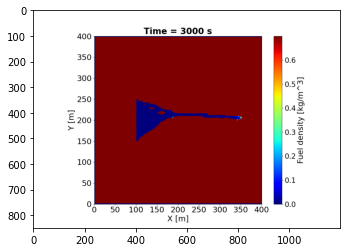

In [15]:
with s3.open('public/QF-Idealized-Grass-Plots/Visualizations/LongLine_WS1.png', mode='rb') as f: 
    i=img.imread(f)
plt.imshow(i) 

# visualize time series

<a id='2d'><h3>Plot bulk density values at surface for timesteps 0,50,100,150,150,200,250,300 s </h3></a>

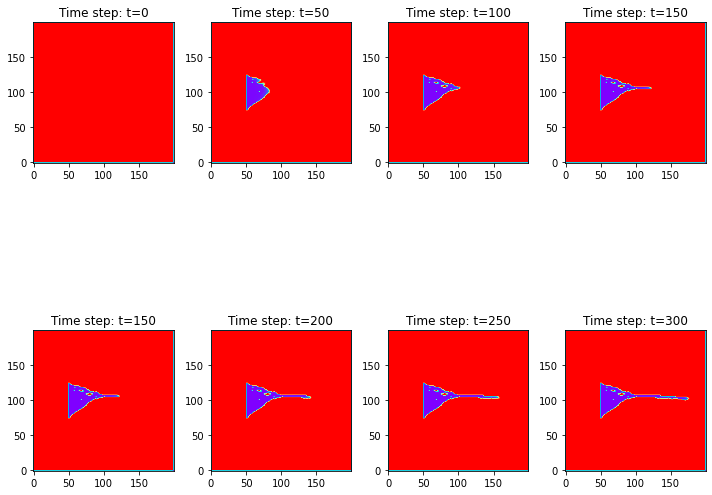

In [16]:
data = np.float32(z)

fig, axs = plt.subplots(2, 4,figsize=(10,10))
times=[0,50,100,150,150,200,250,300]

for i, ax in enumerate(axs.flatten()):
    ax.set_title(f"Time step: t={times[i]}")
    ax.imshow(data[times[i],:,:,0],cmap='rainbow',origin="lower")
fig.tight_layout()    

<a id='3d'><h3>Plot bulk density values in 3d for timesteps 0,50,100,150,150,200,250,300 s </h3></a>

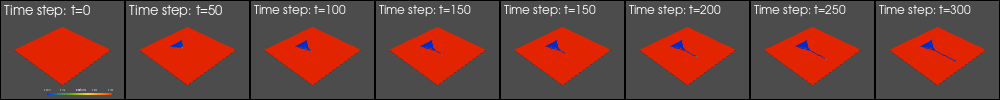

In [17]:
data = np.float32(z)
plotter = pv.Plotter(shape=(1, 8), window_size=(1000,100))
times=[0,50,100,150,150,200,250,300]
for i in range(8):
    plotter.subplot(0, i)
    plotter.add_text(f"Time step: t={times[i]}", font_size=10)
    data[times[i],:,:,:][data[times[i],:,:,:] == 0] = -1  # move zeros to -1 for thresholding
    grid = pv.UniformGrid() # convert the 3D array to a Pyvista UniformGrid
    grid.dimensions = np.array(data[times[i],:,:,:].shape) + 1
    grid.spacing = [1,1,1]
    grid.cell_arrays['values'] = data[times[i],:,:,:].flatten(order='F')
    grid = grid.threshold(0)
    plotter.add_mesh(grid, cmap='rainbow') # add the array to the plotter instance
plotter.show();

References:
- <a href = "https://doi.org/10.1016/j.envsoft.2019.104616">QUIC-fire: A fast-running simulation tool for prescribed fire planning, R.R. Linn et al. </a>
